# Online Retail Exploratory Data Analysis

## Overview

This project aims to provide actionable insights that can drive strategic business decisions and enhance an online retail company's overall performance in the competitive retail market. In this project, I am working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. 

Using exploratory data analysis, my goal is to provide insights into the store's sales trends such as the busiest sales months, customer behavior such as the store's most valuable customers, and popular products. 

## Dataset

The dataset contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file and can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx). You can also find more information at UC Irvine's Machine Learning [website](https://archive.ics.uci.edu/dataset/352/online+retail).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Load the Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
file_path = './OnlineRetail.csv'
retail_data = pd.read_csv(file_path)

## Examine the Data

In [3]:
# Check first few rows
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Check the types of data
retail_data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
# Check countries in the dataset
unique_countries = retail_data['Country'].unique()
unique_countries

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
# Check if there are cancelled orders
cancelled_orders = retail_data[retail_data['Quantity'] < 0]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [7]:
# Find what percentage of orders are cancelled ones
total_orders = retail_data['InvoiceNo'].nunique()
cancelled_total = len(cancelled_orders)
print('Total Cancelled orders: ', cancelled_total)
percentage_cancelled = (cancelled_total/total_orders) * 100
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_total, total_orders,percentage_cancelled))

Total Cancelled orders:  10624
Percentage of orders canceled: 10624/25900 (41.02%) 


## Clean and Validate Data

In [8]:
# confirm if drop occurred successfully
retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
# Format some data
retail_data.head(10).style.format({"UnitPrice": "${:.2f}"})

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,$2.55,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,$3.39,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,$2.75,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,$3.39,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,$3.39,17850.000000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,$7.65,17850.000000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,$4.25,17850.000000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,$1.85,17850.000000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,$1.85,17850.000000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,$1.69,13047.000000,United Kingdom


In [10]:
# confirm if dates look good
retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [11]:
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'], utc=True)

In [12]:
# Add Month Column
retail_data['Month'] = retail_data['InvoiceDate'].dt.strftime('%m')

In [13]:
# Add Year Column
retail_data['Year'] = retail_data['InvoiceDate'].dt.strftime('%Y')

In [14]:
# Add Sales Column
retail_data['Sales'] = retail_data.Quantity * retail_data.UnitPrice

In [15]:
# Add DayOfWeek column
retail_data['DayOfWeek'] = retail_data['InvoiceDate'].dt.day_name()

In [16]:
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Sales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00+00:00,2.55,17850.0,United Kingdom,12,2010,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00+00:00,3.39,17850.0,United Kingdom,12,2010,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00+00:00,2.75,17850.0,United Kingdom,12,2010,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00+00:00,3.39,17850.0,United Kingdom,12,2010,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00+00:00,3.39,17850.0,United Kingdom,12,2010,20.34,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00+00:00,0.85,12680.0,France,12,2011,10.20,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00+00:00,2.10,12680.0,France,12,2011,12.60,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,12,2011,16.60,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,12,2011,16.60,Friday


In [17]:
# Remove the times from the dates
retail_data['InvoiceDate'] = retail_data['InvoiceDate'].dt.date

In [18]:
# Check if change is applied
retail_data['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: InvoiceDate, Length: 541909, dtype: object

In [19]:
# Check if there is any duplicate data
retail_data.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [20]:
# Count number of rows for each columns
retail_data.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
Month          541909
Year           541909
Sales          541909
DayOfWeek      541909
dtype: int64

In [21]:
# Detect the missing or null values
retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Month               0
Year                0
Sales               0
DayOfWeek           0
dtype: int64

In [22]:
# Remove missing values
retail_data = retail_data.dropna()

In [23]:
retail_data.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
Month          406829
Year           406829
Sales          406829
DayOfWeek      406829
dtype: int64

In [24]:
# Confirm removal
retail_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Year           0
Sales          0
DayOfWeek      0
dtype: int64

In [25]:
# Remove cancelled orders
retail_data = retail_data[retail_data['Quantity'] > 0]

In [26]:
retail_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Sales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,12,2010,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,12,2010,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,12,2010,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,12,2010,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,12,2010,20.34,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,12,2011,10.20,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12,2011,12.60,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,12,2011,16.60,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,12,2011,16.60,Friday


In [27]:
# Convert data types of Month and Year for proper calculations in the next steps
retail_data['Month'] = retail_data['Month'].astype('int32')
retail_data['Year'] = retail_data['Year'].astype('int32')

In [28]:
# Convert 'InvoiceDate' to datetime
retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])

# Verify the updated data types
print(retail_data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Month                   int32
Year                    int32
Sales                 float64
DayOfWeek              object
dtype: object


## Analyze Sales Trends Over Time

### Monthly Sales Trends

In [29]:
# Group by month
monthly_sales = retail_data.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()

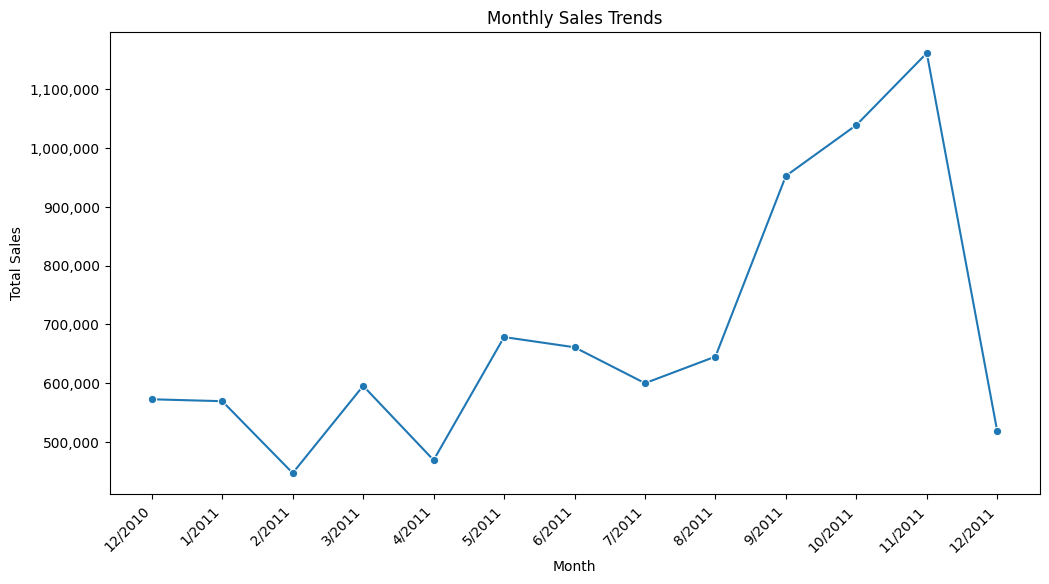

In [30]:
# Plotting monthly sales trends using Seaborn lineplot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=range(len(monthly_sales)), y='Sales', data=monthly_sales, marker='o')

# Customize x-axis labels
xticklabels = [f"{month}/{year}" for year, month in zip(monthly_sales['Year'], monthly_sales['Month'])]
ax.set_xticks(range(len(monthly_sales)))
ax.set_xticklabels(xticklabels, rotation=45, ha='right')

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

### Daily Sales Trends

In [31]:
daily_sales = retail_data.groupby('DayOfWeek').agg({'Sales': 'sum'}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

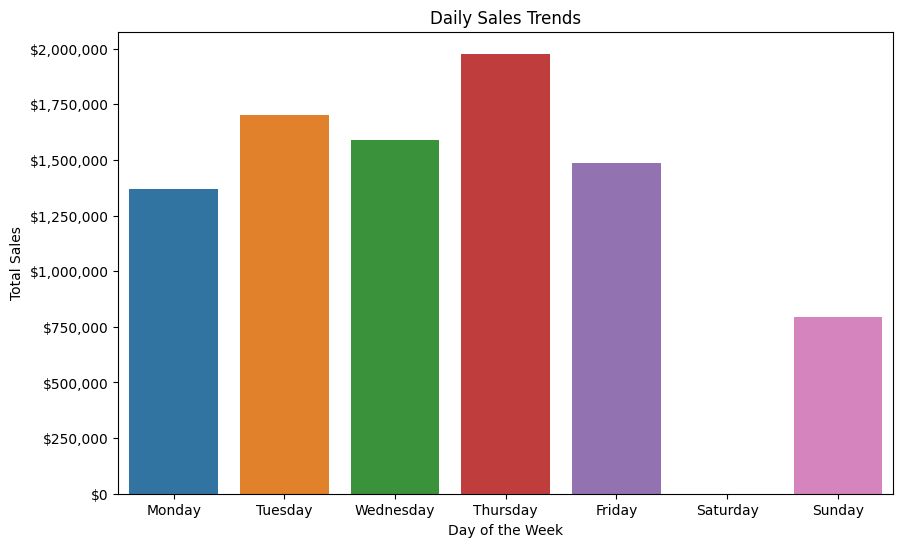

In [32]:
# Plotting daily sales trends
plt.figure(figsize=(10, 6))
plt.title('Daily Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
sns.barplot(data= daily_sales, x= daily_sales['DayOfWeek'], y= daily_sales['Sales'],  hue='DayOfWeek')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))

plt.show()

### Top 10 Best Selling Products

In [33]:
# Group the data by sales
product_sales = retail_data.groupby(['StockCode', 'Description']).agg({'Sales': 'sum'})

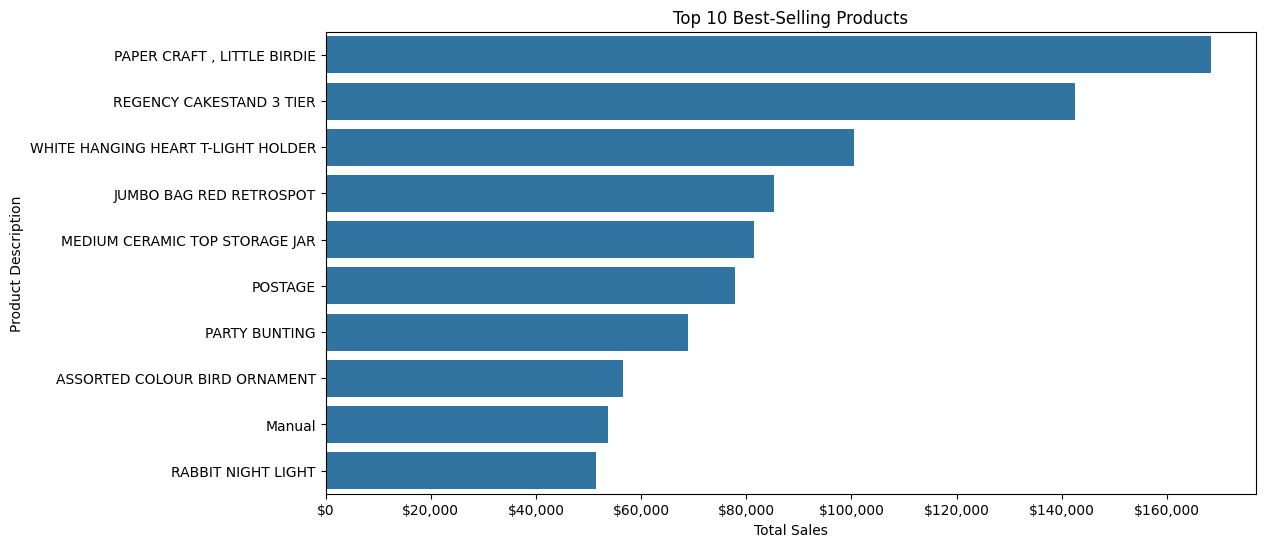

In [34]:
# Plot Top 10 product sales using Seaborn barplot
sorted_product_sales = product_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Sales', y='Description', data=sorted_product_sales.head(10))

# Add labels
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
plt.ylabel('Product Description')
plt.show()

### Market Analysis

In [35]:
# Find out Sales per Country
grouped_country_data = retail_data.groupby('Country').agg({'Sales': 'sum'}).reset_index()

In [36]:
grouped_country_data

,Country,Sales
0,Australia,138521.310
1,Austria,10198.680
2,Bahrain,548.400
3,Belgium,41196.340
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20450.440
7,Cyprus,13590.380
8,Czech Republic,826.740
9,Denmark,18955.340


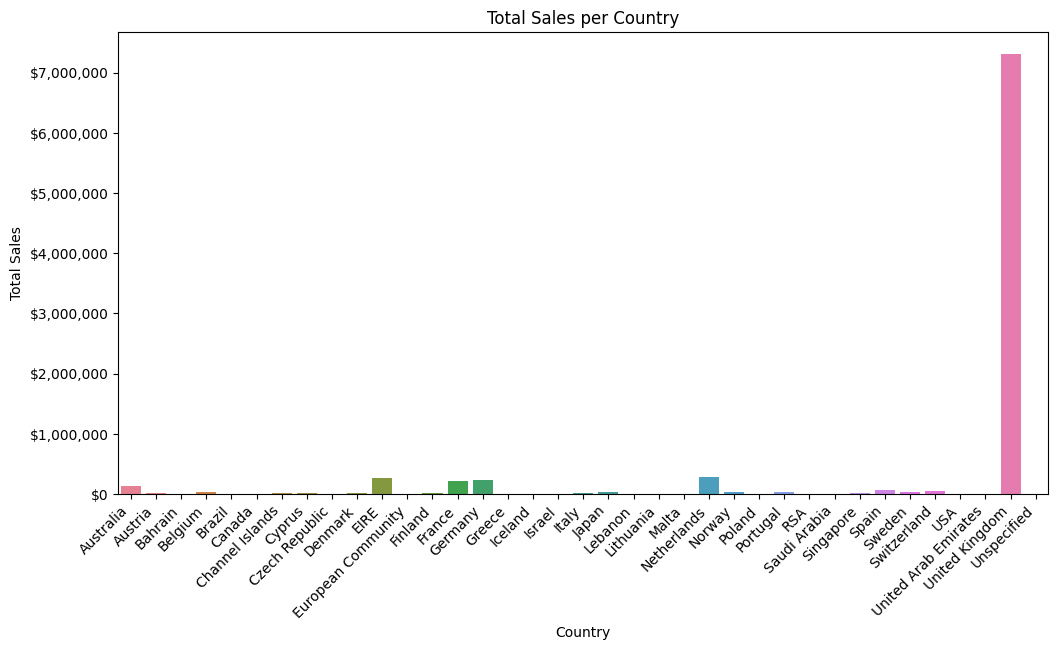

In [37]:
# Display Total Sales per Country as a bar plot using Seaborn
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax = sns.barplot(data=grouped_country_data, x='Country', y='Sales', ax=ax, hue='Country')
plt.title('Total Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
plt.show()

In [38]:
# In above plot we see that UK has the most sales so, let's check the UK market

### Top 10 best selling products in the UK Market

In [39]:
retail_uk = retail_data[retail_data['Country']=='United Kingdom']
top_selling_uk_products = retail_uk.groupby(['StockCode', 'Description']).agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False)
top_10_uk = top_selling_uk_products.head(10)

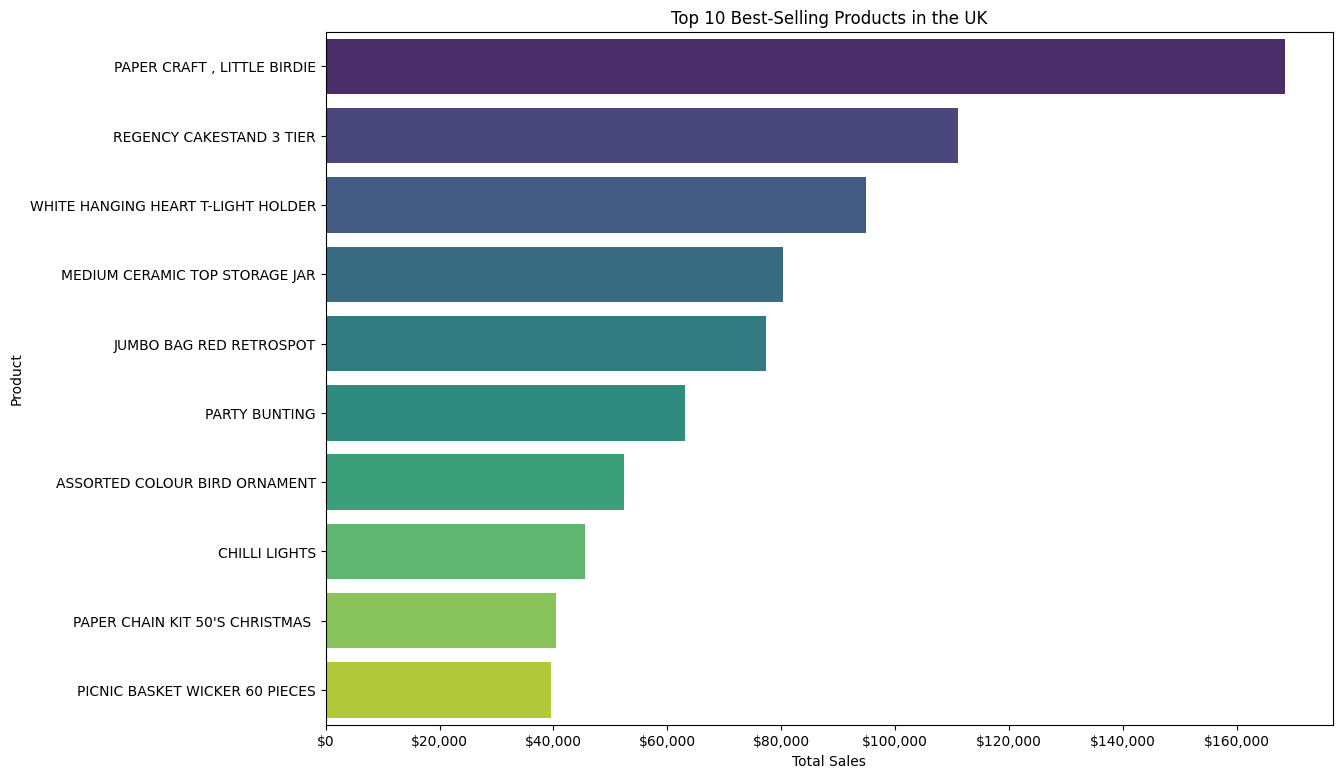

In [40]:
# Display Top 10 Best Selling Products in the UK as bar plot
plt.figure(figsize=(13, 9))
sns.barplot(x='Sales', y='Description', data=top_10_uk, hue ='Description', legend = False, palette='viridis')
plt.title('Top 10 Best-Selling Products in the UK')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
plt.show()

### RFM Analysis for Customer Segmentation


Here I'll do RFM (Recency, Frequency, Monetary) analysis to analyze customer behavior. This is useful if we want to identify who are valuable customers, top customers, who can be leaving etc.

I am trying to find:
- Recent purchases of customers
- Frequency of purchases
- How much money each customer spent in total

In [48]:
retail_data_group = retail_data.groupby('CustomerID').agg({ 'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                                           'InvoiceNo': lambda num: len(num),
                                        'Sales': lambda totalSales: totalSales.sum(),
                                         'Quantity': lambda quantity: quantity.sum()})

In [49]:
retail_data_group.columns=['Recency','Order_Frequency', 'Total_Money_Spent', 'Total_Quantity']

In [50]:
# Check data
retail_data_group

,Recency,Order_Frequency,Total_Money_Spent,Total_Quantity
CustomerID,,,,
12346.0,0,1,77183.60,74215
12347.0,365,182,4310.00,2458
12348.0,283,31,1797.24,2341
12349.0,0,73,1757.55,631
12350.0,0,17,334.40,197
...,...,...,...,...
18280.0,0,10,180.60,45
18281.0,0,7,80.82,54
18282.0,119,12,178.05,103


In [51]:
# Add customerID as column as well
retail_data_group = retail_data_group.reset_index()

### Top 10 Customers

In [52]:
top_10_customers = retail_data_group.nlargest(10, 'Total_Money_Spent')

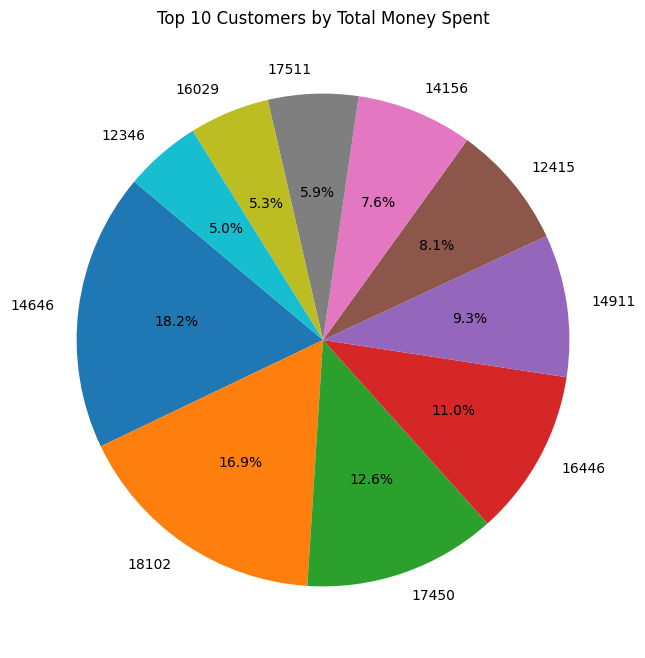

In [53]:
# Create a pie chart to display top 10 valuable customers
plt.figure(figsize=(8, 8))
plt.pie(top_10_customers['Total_Money_Spent'], labels=top_10_customers['CustomerID'].astype(int), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Customers by Total Money Spent')
plt.show()